<a href="https://colab.research.google.com/github/asfanjamil/EDA-project-AIRBNb/blob/main/MY_eda_project_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Airbnb?
### Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Airbnb NYC 2019.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.loc[:,df.isna().sum()!=0]

,name,host_name,last_review,reviews_per_month
0,Clean & quiet apt home by the park,John,2018-10-19,0.21
1,Skylit Midtown Castle,Jennifer,2019-05-21,0.38
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,NaN,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,2019-07-05,4.64
4,Entire Apt: Spacious Studio/Loft by central park,Laura,2018-11-19,0.10
...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,NaN,NaN
48891,Affordable room in Bushwick/East Williamsburg,Marisol,NaN,NaN
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,NaN,NaN
48893,43rd St. Time Square-cozy single bed,Taz,NaN,NaN


In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
percentage_of_data_having_availbility_0= round((len(df[df['availability_365']==0]['availability_365'])/len(df['availability_365']))*100,2)
print(f'the percentage of data having availibity as 0 is {percentage_of_data_having_availbility_0}')

the percentage of data having availibity as 0 is 35.86


***So we can clearly notice that availiabilty column is having minmum value as well as 25th percentile is 0 , so this seems awkward beacuse having availability days 0 for 36% of data is bit shocking , If you have a business of providing shelters for Airbnb your availibility is 0 days that is extreme case and extreme cases is obviously shocking when it comes 36% of data is having extreme case***


**but its not practicaly possible to exactly detect which apartments are having realy availabilty 0 days , so we will not alter this column as if we try to alter we can end up manipulating appartments which are really mostly busy (i.e 0 no. of days availibility**


**We can also clearly see that minimum price is 0 , which is surprising as price 0 doesnt make sense to do business**

## **Q1** check out the last_review wise count of where availability_365 is 0?

In [ ]:
df[df['availability_365']==0].groupby(['last_review']).size().sort_values(ascending=False).head(15)

last_review
2019-01-01    194
2018-01-01    142
2019-01-02    129
2019-06-23     90
2018-01-02     86
2017-01-01     85
2019-05-27     75
2017-01-02     73
2016-01-02     67
2019-07-01     63
2016-01-03     61
2018-12-30     61
2019-01-03     60
2019-06-24     59
2018-12-31     57
dtype: int64

**lets fill these datas with appropriate price values (by filling the price with median price for each room_type**

In [ ]:
df.loc[ (df.room_type=='Entire home/apt') & (df.price==0),'price']=df.loc[ (df.room_type=='Entire home/apt') & (df.price!=0),'price'].median()
df.loc[ (df.room_type=='Private room') & (df.price==0),'price']=df.loc[ (df.room_type=='Private room') & (df.price!=0),'price'].median()
df.loc[ (df.room_type=='Shared room') & (df.price==0),'price']=df.loc[ (df.room_type=='Shared room') & (df.price!=0),'price'].median()

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.739094,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.146276,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000



**NOTE: We can notice that we have succesfully updated the price column where we have values as 0 , we succesfully updated the value with respective price value**

In [ ]:
df.fillna({'reviews_per_month':0},inplace=True)

## **Q2** .Which hosts are having heighest number of appartments ?

In [ ]:
hosts_areas = df.groupby(['host_name','host_id','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(5)

,host_name,host_id,neighbourhood_group,calculated_host_listings_count
33329,Sonder (NYC),219517861,Manhattan,327
4884,Blueground,107434423,Brooklyn,232
4885,Blueground,107434423,Manhattan,232
19038,Kara,30283594,Manhattan,121
19674,Kazuya,137358866,Queens,103


**So Sonder (NYC) is having maximum numbers of rooms for the guest, For Airbnb he might be very important person then**

In [ ]:
df_sonder=df[df['host_name']=='Sonder (NYC)']
df_sonder[['host_name','neighbourhood_group','neighbourhood','latitude','longitude']].head(6)

,host_name,neighbourhood_group,neighbourhood,latitude,longitude
38293,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645
38294,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641
38588,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443
39769,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614
39770,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528
39771,Sonder (NYC),Manhattan,Murray Hill,40.74845,-73.97446


**so Sonder (NYC) is having multiple appartments in same building in different different neighbourhood**

### **Q3**. Which are the top 10 neighbourhood which are having maximum number of appartments for airbnb ?

In [19]:
df['neighbourhood'].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

<AxesSubplot:>

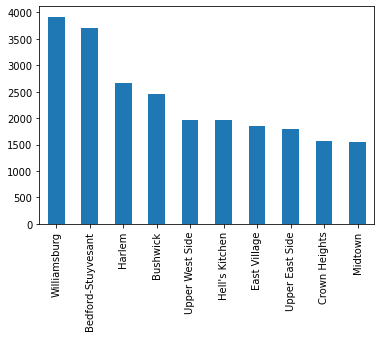

In [20]:
# plotting top 10 neighbourhood which are having maximum number of appartments for airbnb in the respective neighbourhood

pd.value_counts(df['neighbourhood'])[:10].plot.bar()

In [21]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

<AxesSubplot:>

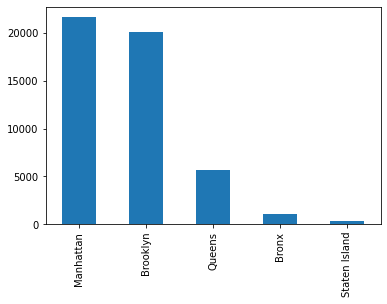

In [22]:
pd.value_counts(df['neighbourhood_group']).plot.bar()

## **Q4**. What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [24]:
areas_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


In [25]:
area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']

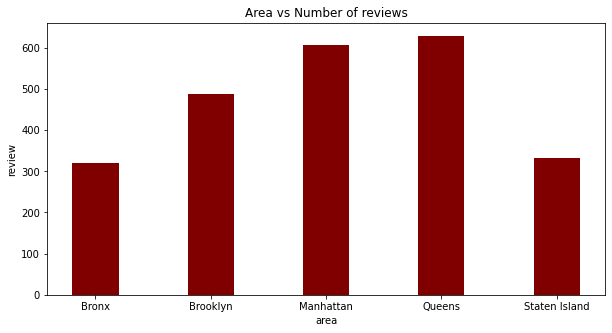

In [26]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(area, review, color ='maroon',
        width = 0.4)
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()

In [28]:
price_area = df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,10,93
1,11,113
2,12,8
3,13,9
4,15,19


In [29]:
area = price_area['price']
price = price_area['number_of_reviews']

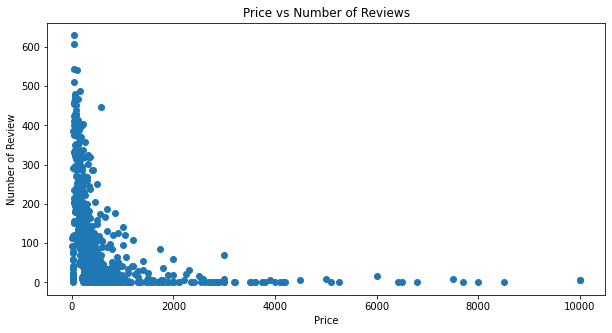

In [30]:
fig = plt.figure(figsize = (10, 5))
 
# creating the scatter plot
plt.scatter(area, price)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

## **From the above Analysis we can say that most people prefer to stay in place where price is less**

## **Q5** .What is the distribution of the room type and its distribution over the location ?

<AxesSubplot:>

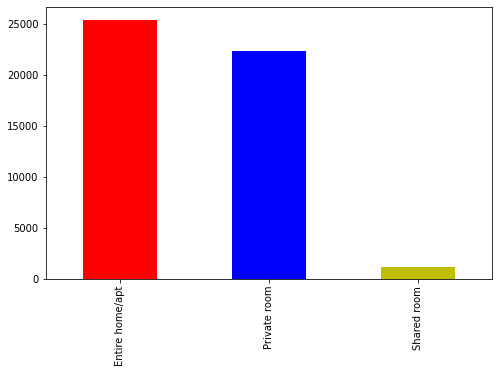

In [31]:
plt.figure(figsize=(8,5))
df['room_type'].value_counts().plot(kind='bar',color=['r','b','y'])

So we can notice following

## 1) that maximum numbers of room are Entire home/Apartment and Private room there are only few shared rooms .
## 2)So mostly host prefer to give Entire home/Appartment or Private Rooms rather than Shared room 

## lets see how room_type is distributed over all location

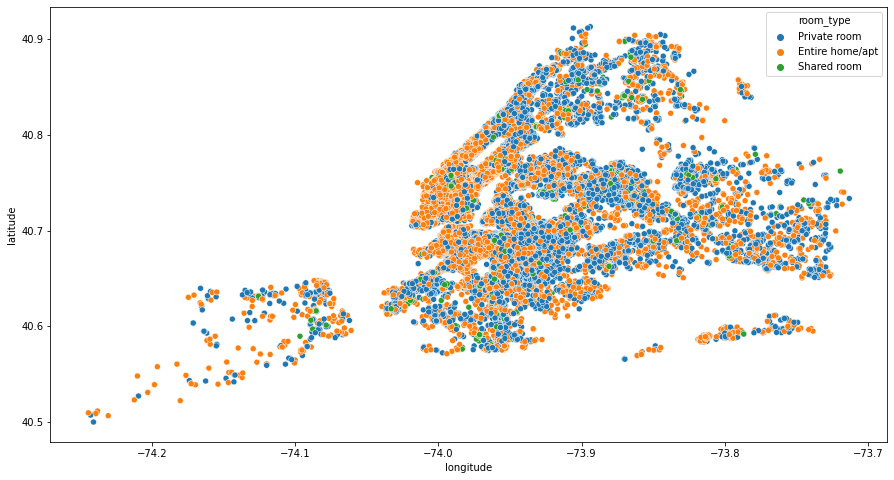

In [32]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['longitude'],y=df['latitude'], hue=df['room_type'])
plt.show()

### **Q6**. How the price column is distributed over room_type and are there any Surprising items in price column ?

In [36]:
# first get rid of 0 price
df_price=df[df['price']!=0].copy()

<AxesSubplot:xlabel='price', ylabel='room_type'>

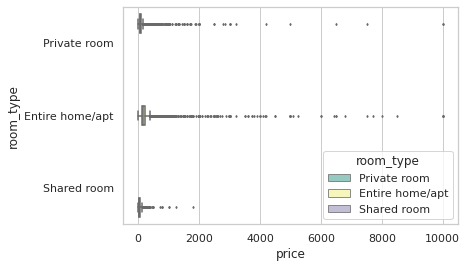

In [37]:
sns.set_theme(style='whitegrid')
sns.boxplot(y='room_type',x='price',hue='room_type',palette='Set3',linewidth=1.5,fliersize=1.5 , data=df_price)


**we can notice that there are many outliers for price in each of the room_type category, so lets just why there is so high price or what else we can conclude for hosts having highest price for the rooms**

In [ ]:
# lets check out the who is having highest price of all
# and we will check its rating, minimum nights, availability_365  and last reviews in order judge

In [38]:

df[df['price']==df['price'].max()][['host_name','reviews_per_month','last_review','availability_365','price','neighbourhood_group']]

,host_name,reviews_per_month,last_review,availability_365,price,neighbourhood_group
9151,Kathrine,0.04,2016-02-13,0,10000,Queens
17692,Erin,0.16,2017-07-27,0,10000,Brooklyn
29238,Jelena,0.00,NaN,83,10000,Manhattan


### **Clearly if i would have working in Airbnb I would have suggested the following**

1) kathrine and Erin have price so high and having no availability then what is the benifit of keeping too high price .

2) The last review is also 3-4 years back (as the data was collected in 2019) which is also bad

3) The review may be low as there may be very few people who is staying in kathrine, Erin and jelena apartment so might have less reviews per month

4) I would have suggested to keep moderate(average) price so that more people would visit and stay in her appartment , it would also increase her reviews per month.

### **Q7**.  Which hosts are the busiest and why?

In [39]:
busiest_hosts = df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37748,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


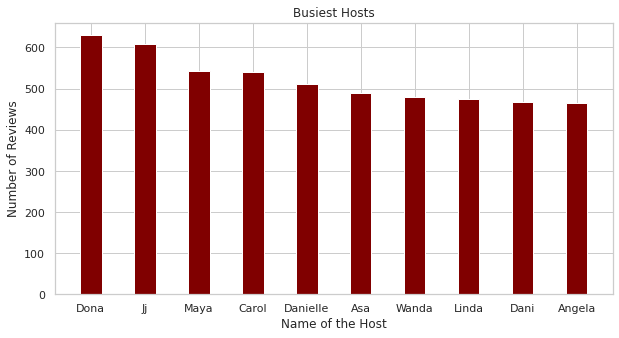

In [40]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, reviews, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

## **Because these hosts listed room type as Entire home and Private room which is preferred by most number of people.**

# Conclusion:
1. The people who prefer to stay in Entire home or Apartment they are going to stay bit longer in that particular Neighbourhood only.
2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.
3. Most people prefer to pay less price.
4. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.
5. If people are not staying more then one night means they are travellers

# **Thanks**